<a href="https://www.kaggle.com/code/ayushikashyap/97-7-extroverts-vs-introverts-eda-and-stats?scriptVersionId=252496326" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="
  background-color: #B6D0E2;
  padding: 40px 20px;
  border-radius: 10px;
  width: 80%;
  margin: 20px auto;
  text-align: center;
  color: #2c3e50;
  font-size: 20px;
  font-weight: 500;
">
<strong>Predict the Introverts 😶‍🌫 from the Extroverts 😎😝</strong> Comprehensive Exploratory and Statistical Analysis for <strong>Beginners</strong>
</div>


<div style="text-align: center;">
  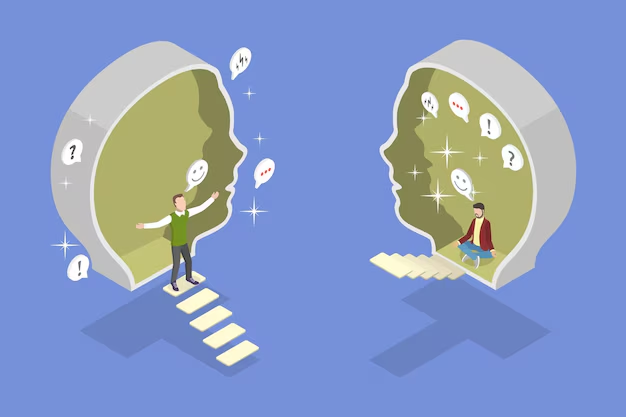
</div>
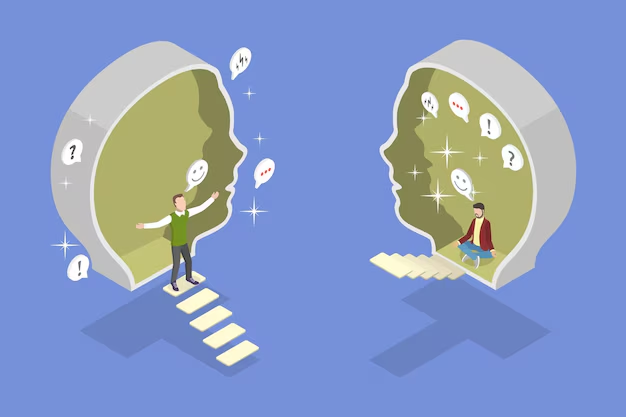

---

## 📊 Import Libraries and Dataset

---

**Libraries**: 
- **Numpy**: Adds support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
- **Pandas**: Processes and manipulates tabular data, implementing operations such as loading, aligning, merging, and transforming datasets efficiently.
- **os**: Interactes with the operating system, creating files and directories, management of files and directories, input, output, environment variables, process management, etc.
- **seaborn**: Makes statistical graphics in Python.
- **matplotlib**: Creates static, interactive, and animated visualizations in Python.
- **scipy.stats**: Works with various probability distributions, conducting hypothesis tests, and computing descriptive statistics.
- **train_test_split**: Split the training data into train and validation set.
- **CatBoostClassifier**: A supervised machine learning method that uses decision trees for classification and regression.

**Importing Files**: Importing the train and test files from the kaggle input folder.

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import normaltest, skew, kurtosis
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s5e7/sample_submission.csv
/kaggle/input/playground-series-s5e7/train.csv
/kaggle/input/playground-series-s5e7/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s5e7/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s5e7/test.csv")

---

## 🗂️ EDA on Datasets

---

**Features**:

- **Time_spent_Alone**: Hours spent alone daily (0–11).
- **Stage_fear**: Presence of stage fright (Yes/No).
- **Social_event_attendance**: Frequency of social events (0–10).
- **Going_outside**: Frequency of going outside (0–7).
- **Drained_after_socializing**: Feeling drained after socializing (Yes/No).
- **Friends_circle_size**: Number of close friends (0–15).
- **Post_frequency**: Social media post frequency (0–10).
- **Personality**: Target variable (Extrovert/Introvert).

**Train Dataset**: <code>Personality</code> is the Target Variable.

**Test Dataset**: Objective is to predict the <code>Personality</code> for each row.

### Let's check the size of data we are dealing with here!

In [3]:
print(f"Number of rows in train dataset {len(train)} and in test dataset {len(test)}.")

Number of rows in train dataset 18524 and in test dataset 6175.


In [4]:
train.head(2)

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert


In [5]:
test.head(2)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0


<div style="border-left: 5px solid #f39c12; background-color: #FFFFC5; padding: 10px; border-radius: 5px; color: #000000;">
  ⚠️ <strong>Warning:</strong> Did you see the warning we got while checking the <code>.head()</code> of test dataset?
</div>


The warning might suggest that Pandas tried to compare a NaN or inf value during formatting. It typically happens when:

- The DataFrame contains NaN, inf, or -inf.
- Pandas tries to format those during pretty printing.
- It's checking if values are too large/small to be formatted in scientific notation.

We shall get into detailed checks later on in the script.

### Lets check the more details of the datasets.

We can use these basic functions to check the dataframe details.

- <code>.info()</code> is used to print information about a DataFrame including the index dtype and columns, non-null values and memory usage.
- <code>.describe()</code> is used to get descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding NaN values.

**Summary Statistics**

We can see the differnece between the total number of rows in the datasets and the number of non-null values in few of the columns. As an example, the total number of rows in the train dataset is 1460 and the number of non-null value in it's column 'Alley' is only 91, indicating the presence of non-null or missing values.

Let's look more into the summary statistics of the numerical columns using .describe(), which gives below information for each column.

- count - The number of not-empty values.
- mean - The average (mean) value.
- std - The standard deviation.
- min - the minimum value.
- 25% - The 25% percentile*.
- 50% - The 50% percentile*.
- 75% - The 75% percentile*.
- max - the maximum value.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [7]:
train.describe()

,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,18524.000000,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,9261.500000,3.137764,5.265106,4.044319,7.996737,4.982097
std,5347.562529,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4630.750000,1.000000,3.000000,3.000000,5.000000,3.000000
50%,9261.500000,2.000000,5.000000,4.000000,8.000000,5.000000
75%,13892.250000,4.000000,8.000000,6.000000,12.000000,7.000000
max,18523.000000,11.000000,10.000000,7.000000,15.000000,10.000000


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6175 entries, 0 to 6174
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         6175 non-null   int64  
 1   Time_spent_Alone           5750 non-null   float64
 2   Stage_fear                 5577 non-null   object 
 3   Social_event_attendance    5778 non-null   float64
 4   Going_outside              5709 non-null   float64
 5   Drained_after_socializing  5743 non-null   object 
 6   Friends_circle_size        5825 non-null   float64
 7   Post_frequency             5767 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 386.1+ KB


In [9]:
test.describe()

,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,6175.000000,5750.000000,5778.000000,5709.000000,5825.000000,5767.000000
mean,21611.000000,3.116870,5.287989,4.037835,8.008412,5.028958
std,1782.713288,2.985658,2.758052,2.045207,4.192701,2.867285
min,18524.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20067.500000,1.000000,3.000000,3.000000,5.000000,3.000000
50%,21611.000000,2.000000,5.000000,4.000000,8.000000,5.000000
75%,23154.500000,4.000000,8.000000,6.000000,12.000000,7.000000
max,24698.000000,11.000000,10.000000,7.000000,15.000000,10.000000


<div style="background-color: #D5FFFF; padding: 10px; border-radius: 5px; color: #000000;">
  🔍 <strong>Inferences:</strong> Basic inferences we can make from the <strong>train</strong> and <strong>test</strong> datasets.
</div>


| Feature                         | Train (Row Count) | Test (Row Count) | Train Missing? | Test Missing? |
| ------------------------------- | ----------------- | ---------------- | -------------- | ------------- |
| **Total Rows**                  | 18524             | 6175             | —              | —             |
| **Total Columns**               | 8                 | 8                | —              | —             |
| **id**                          | 18524             | 6175             | ❌              | ❌             |
| **Time\_spent\_Alone**          | 17334             | 5750             | ✅              | ✅             |
| **Stage\_fear**                 | 16631             | 5577             | ✅              | ✅             |
| **Social\_event\_attendance**   | 17344             | 5778             | ✅              | ✅             |
| **Going\_outside**              | 17058             | 5709             | ✅              | ✅             |
| **Drained\_after\_socializing** | 17375             | 5743             | ✅              | ✅             |
| **Friends\_circle\_size**       | 17470             | 5825             | ✅              | ✅             |
| **Post\_frequency**             | 17260             | 5767             | ✅              | ✅             |

#### Now that we know that each of the datasets have missing values, we can look into each dataset individually!


---

## 📚 EDA on Target Variable - Personality

---
Let’s now focus on EDA on the target variable, <strong>Personality</strong>, which is categorical. 

✅ In the analysis, we are including:

- Value counts (for classification targets)
- Balance check (is the target skewed?)
- Relationship of target with key features:
    - Boxplots (for numeric features vs. target)
    - Countplots (for categorical features vs. target)
- Statistical tests (if needed: chi-square, ANOVA)

#### Value count and Percentage count for Personality

Count the number of categories and the percentage of each category in the train dataset for the Target Variable <strong>Personality</strong>.

In [10]:
value_count = train['Personality'].value_counts()
value_count

Personality
Extrovert    13699
Introvert     4825
Name: count, dtype: int64

In [11]:
percentage_count = train['Personality'].value_counts(normalize = True) * 100
percentage_count

Personality
Extrovert    73.95271
Introvert    26.04729
Name: proportion, dtype: float64

#### Count plot to show the distribution of Personality across the dataset using it's count.

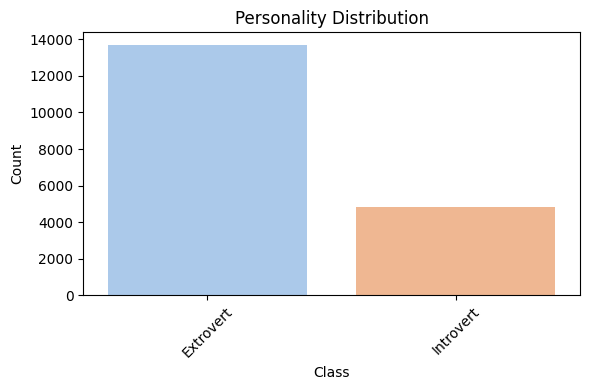

In [12]:
plt.figure(figsize = (6,4))
sns.countplot(data=train, x='Personality', palette='pastel')
plt.title('Personality Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Checking for imbalance using the persontage.

If the percentage of any of the categories in the Personality is higher than 70%, the class can be imbalanced.

In [13]:
if percentage_count.max() > 70:
    print("⚠️ Warning: The target variable appears to be imbalanced.")

⚠️ Warning: The target variable appears to be imbalanced.


<div style="background-color: #D5FFFF; padding: 10px; border-radius: 5px; color: #000000;">
  🔍 <strong>Inferences: Target variable</strong> Personality <strong> analysis.
</div>
The target variable Personality is <strong>inbalanced</strong>, with a dominant class (Extrovert) making up nearly 74% of the data.

#### Relationship with Categorical Features

Using a countplot, we can check the distribution and relationship of the Target Variable with the Categorical Features.

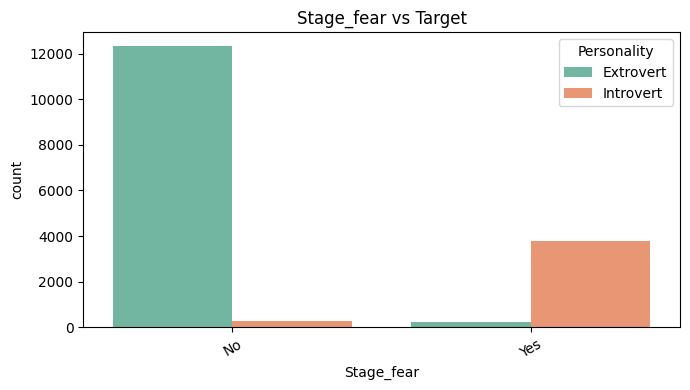

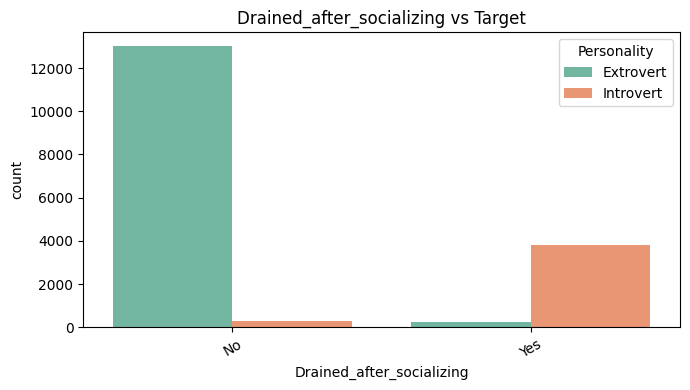

In [14]:
categorical_cols = train.select_dtypes(include=['object']).columns.drop('Personality')

for col in categorical_cols:
    plt.figure(figsize=(7, 4))
    sns.countplot(data=train, x=col, hue='Personality', palette='Set2')
    plt.title(f'{col} vs Target')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

<div style="background-color: #D5FFFF; padding: 10px; border-radius: 5px; color: #000000;">
  🔍 <strong>Inferences: Target variable</strong> Personality <strong> vs <strong>Categorical Features</strong>
</div>
The target variable Personality count is <strong>higher</strong> for people who responded <strong>No</strong> for columns <Strong>Stage Fear</Strong> and <strong>Drained after Socializing</strong>, with a dominant class (Extrovert) making up nearly 74% of the data.

#### Relationship with Numerical Features

Using a boxplots, we can check the distribution and relationship of the Target Variable with the Numerical Features.

#### Why Boxplots?

Boxplots (or box-and-whisker plots) are ideal for comparing distributions of a numerical feature across categories, especially when the target variable is categorical, like "Extrovert" vs "Introvert".

1. Shows Distribution Clearly:	Boxplots show median, quartiles, and outliers, helping you understand how the feature values spread across each class of the target.
2. Reveals Differences Between Groups:	You can easily compare the central tendency (medians) and spread (IQR) of numerical features across target classes.
3. Detects Overlap or Separation:	If boxes are clearly separated, the feature may be good for classification. If they overlap a lot, it might not help the model much.
4. Handles Outliers Gracefully:	Boxplots visualize outliers explicitly using points outside the whiskers.
5. Compact Yet Informative:	One plot gives a lot of information without overwhelming detail—perfect for EDA summaries.

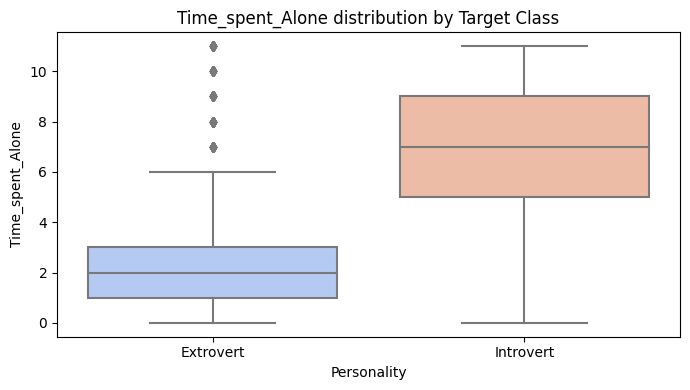

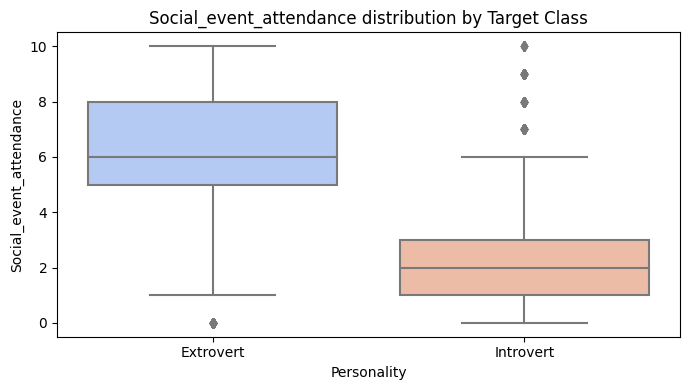

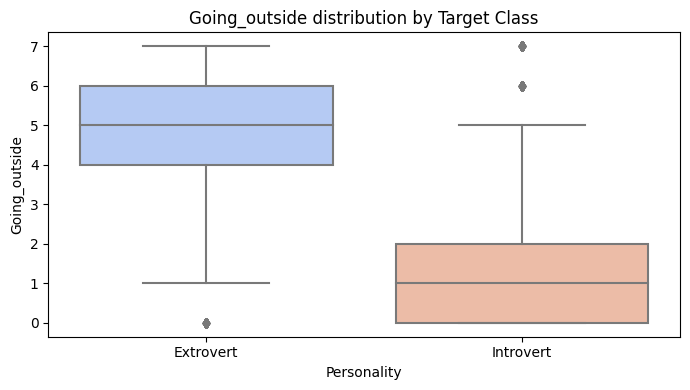

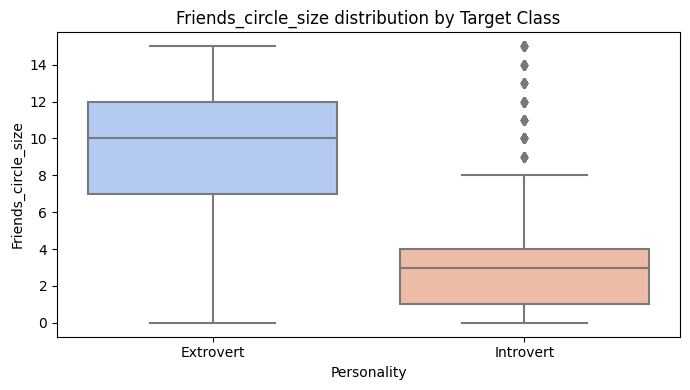

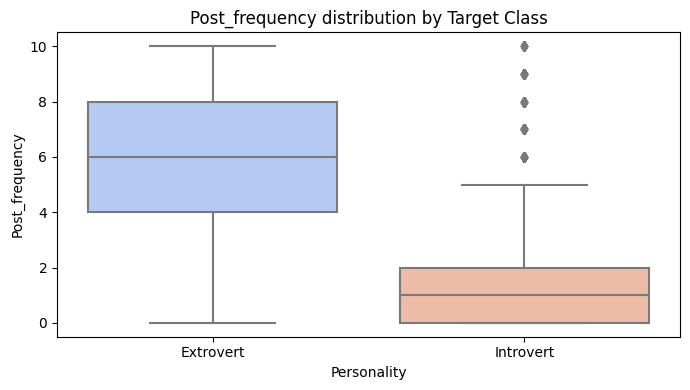

In [15]:
numeric_cols = train.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    if col != 'id':
        plt.figure(figsize=(7, 4))
        sns.boxplot(data=train, x='Personality', y=col, palette='coolwarm')
        plt.title(f'{col} distribution by Target Class')
        plt.tight_layout()
        plt.show()

<div style="background-color: #D5FFFF; padding: 10px; border-radius: 5px; color: #000000;">
  🔍 <strong>Inferences: Target variable</strong> Personality <strong> vs <strong>Numerical Features</strong>
</div>
      
#### Time Alone Spent vs Personality
The boxplot shows that the median for 'Extrovert' who spend 'Time Alone' is lower than that of 'Introvert'. The boxplot for Extroverts includes a few outliers, to the top whisker, with high values for time spent alone. This indicates that some extroverts in the dataset report spending significantly more time alone than the rest of their group.

#### Social Event Attendence vs Personality
The boxplot shows that the median for 'Introvert' who 'Attend Social Events' is lower than that of 'Extrovert'. The boxplot for Introvert includes a few outliers, for lower whisker, with low values for social event attendance. This indicates that some introverts in the dataset report attending significantly less social events than the rest of their group.

#### Friend Circle Size vs Personality
The boxplot shows that the median for 'Introvert's Social Circle Size' is lower than that of 'Extrovert'. The boxplot for Introvert includes a few outliers, for upper whisker, with high values for friend circle size. This indicates that some introverts in the dataset report have significantly higher friend circle size than the rest of their group.

#### Post Frequency vs Personality
The boxplot shows that the median for 'Introvert' who 'Post Frequency' is lower than that of 'Extrovert'. The boxplot for Introvert includes a few outliers, for lower whisker, with low values for post frequency. This indicates that some introverts in the dataset report post significantly less frequenctly than the rest of their group.

#### Chi-Squared Test

Chi-square test to examine the association between <strong>categorical</strong> features and the <strong>target variable</strong>.
It helps determine whether there's a statistically significant association between two categorical variables — in this case, between each feature and the target variable Personality (Introvert vs Extrovert).

In [16]:
from scipy.stats import chi2_contingency

for col in categorical_cols:
    contingency = pd.crosstab(train[col], train['Personality'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"Chi-square test between '{col}' and target: p-value = {p:.4f}")

Chi-square test between 'Stage_fear' and target: p-value = 0.0000
Chi-square test between 'Drained_after_socializing' and target: p-value = 0.0000


<div style="background-color: #D5FFFF; padding: 10px; border-radius: 5px; color: #000000;">
  🔍 <strong>Inferences: Chi-Squared Test</strong> on the <strong>Target variable</strong> Personality.
</div>

Feature	p-value	Interpretation
<strong>Stage Fear</strong> - 0.0000 --> ✅ Significant association with Personality. Likely to influence personality classification.
<strong>Drained After Socializing</strong> - 0.0000 --> ✅ Significant association with Personality. Strongly related to introversion/extroversion.

<strong>Since both p-values are < 0.05, we reject the null hypothesis of independence — there is a meaningful relationship between these features and the target.</strong>

---

## 📚 EDA on Feature Variables

---
Let’s now focus on EDA on the feature variables:

✅ In the analysis, we are including:

- Univariant Summary Statistics
- Distribution Plots
- Missing Value Analysis
- Feature Correlations

#### Univariant Summary Statistics

We want to compute a comprehensive statistical summary for each numerical feature in a dataset — more than just df.describe(). This includes:

- Count, missing values
- Mean, SD, Standard Error
- Skewness, Kurtosis
- Percentiles (1%, 5%, …, 99%, 100%)
- IQR (Interquartile Range)

In [17]:
def extended_describe(df, columns):
    stats = []
    for col in columns:
        data = df[col].dropna() # Drop NAs from the dataset
        n = data.count() # Number of valid rows
        na = df[col].isna().sum() # Number of NA rows
        mean = data.mean() # Mean
        std = data.std() # Standard Deviation
        se_mean = std / np.sqrt(n) # Standard Error of Mean
        iqr = data.quantile(0.75) - data.quantile(0.25) # Inter Qunatile Range
        row = {
            'feature': col,
            'n': n,
            'na': na,
            'mean': mean,
            'sd': std,
            'se_mean': se_mean,
            'IQR': iqr,
            'skewness': skew(data), # Skewness
            'kurtosis': kurtosis(data), # Kutosis: Tail Heaviness
            'p01': data.quantile(0.01),
            'p05': data.quantile(0.05),
            'p10': data.quantile(0.10),
            'p25': data.quantile(0.25),
            'p50': data.quantile(0.50),
            'p75': data.quantile(0.75),
            'p90': data.quantile(0.90),
            'p95': data.quantile(0.95),
            'p99': data.quantile(0.99),
            'p100': data.max()
        }
        stats.append(row)
    return pd.DataFrame(stats)

In [18]:
numerical_cols = train.select_dtypes(include='number').columns
eda_table = extended_describe(train, numerical_cols)
print(eda_table)

                   feature      n    na         mean           sd    se_mean  \
0                       id  18524     0  9261.500000  5347.562529  39.290584   
1         Time_spent_Alone  17334  1190     3.137764     3.003786   0.022815   
2  Social_event_attendance  17344  1180     5.265106     2.753359   0.020907   
3            Going_outside  17058  1466     4.044319     2.062580   0.015792   
4      Friends_circle_size  17470  1054     7.996737     4.223484   0.031954   
5           Post_frequency  17260  1264     4.982097     2.879139   0.021915   

      IQR  skewness  kurtosis     p01     p05     p10      p25     p50  \
0  9261.5  0.000000 -1.200000  185.23  926.15  1852.3  4630.75  9261.5   
1     3.0  1.133679  0.353878    0.00    0.00     0.0     1.00     2.0   
2     5.0 -0.229218 -0.925306    0.00    0.00     1.0     3.00     5.0   
3     3.0 -0.367189 -0.781008    0.00    0.00     1.0     3.00     4.0   
4     7.0 -0.051802 -1.080349    0.00    1.00     2.0     5.00     8.

<div style="background-color: #D5FFFF; padding: 10px; border-radius: 5px; color: #000000;">
  🔍 <strong>Inferences: Univariant Analysis</strong>.
</div>

🔹 Time_spent_Alone
- mean = 3.13: On average, people spend ~3 units of time alone.
- sd = 3.00: There’s high variability; people differ a lot.
- skewness = 1.13: Right-skewed — some people spend a lot more time alone.
- p75 = 4, p90 = 8, p99 = 11: Top 1% spend up to 11 hours alone (much more than the median 2).
- na = 1190: You have ~6% missing data — consider imputation.

🔹 Friends_circle_size
- mean = 7.99, IQR = 7: Most people have between 5–12 friends.
- skewness = -0.05: Slightly left-skewed — very symmetric.
- kurtosis = -1.08: Light tails — values not too extreme.

🔹 Post_frequency
- mean = 4.98, median (p50) = 5, p95 = 9: Most users post up to 9 times.
- sd = 2.88: Moderate variation in posting frequency.
- skewness = -0.05: Almost symmetric.
- na = 1264: Missing values.

#### Missing values

- Zeroes: The number of zeroes in a column.
- NaNs: The number of NaNs in a column.
- None: The number of 'None' appearing as a string a column.
- Percentage: The percentage of missing values for each column.
- Data Type: The datatype of each column for reference.

In [19]:
def miss_data(data):
    miss_df = ((data == 0).sum().to_frame())
    miss_df = miss_df.rename(columns = {0:'Zeroes'})
    miss_df.index.name = 'Features'
    miss_df['NaN'] = (data.isnull()).sum()
    miss_df['None'] = (data == None).sum()
    miss_df['Total'] = miss_df['Zeroes'] + miss_df['NaN'] + miss_df['None']
    miss_df['Percent'] = 100 * miss_df['Total'] / len(data)
    miss_df['Type'] = [data[i].dtype for i in miss_df.index]
    return miss_df.sort_values(ascending = False, by = 'Percent')

In [20]:
miss_df = miss_data(data = train)
miss_df

,Zeroes,NaN,None,Total,Percent,Type
Features,,,,,,
Time_spent_Alone,3139,1190,0,4329,23.369683,float64
Going_outside,1324,1466,0,2790,15.061542,float64
Post_frequency,1272,1264,0,2536,13.690348,float64
Social_event_attendance,1055,1180,0,2235,12.065429,float64
Stage_fear,0,1893,0,1893,10.219175,object
Friends_circle_size,467,1054,0,1521,8.210970,float64
Drained_after_socializing,0,1149,0,1149,6.202764,object
id,1,0,0,1,0.005398,int64
Personality,0,0,0,0,0.000000,object


<div style="background-color: #D5FFFF; padding: 10px; border-radius: 5px; color: #000000;">
  🔍 <strong>Inferences: Missing Values in each column</strong>.
</div>

1. Time_spent_Alone: 3139 zeroes, 1190 NaNs → total 4329 out of all rows. A large portion of this column is missing or zero (23.36%).

2. Going_outside: 15% of entries are either 0 or NaN.

3. Post_frequency: 13.69% problematic (0 or NaN).

4. Social_event_attendance: 12% of data missing or zero.

5. Stage_fear: Only NaN and no numeric 0s (1893 missing = 10.2%).

6. Friends_circle_size: 8.2% missing/zero.

7. Drained_after_socializing: 6.2% missing (NaNs only).

9. Personality: No missing or zero values.

#### Feature Correlation

Feature correlation measures the statistical relationship between two variables (features). It quantifies how much one variable changes when the other changes.
- A positive correlation means when one feature increases, the other tends to increase.
- A negative correlation means when one feature increases, the other tends to decrease.
- A correlation close to zero means no linear relationship between features.

Since, the Target Variable is Categorical, we can convert the target variable as Numerical, where Introvert is represented as 0 and Extrovert is represented as 1.

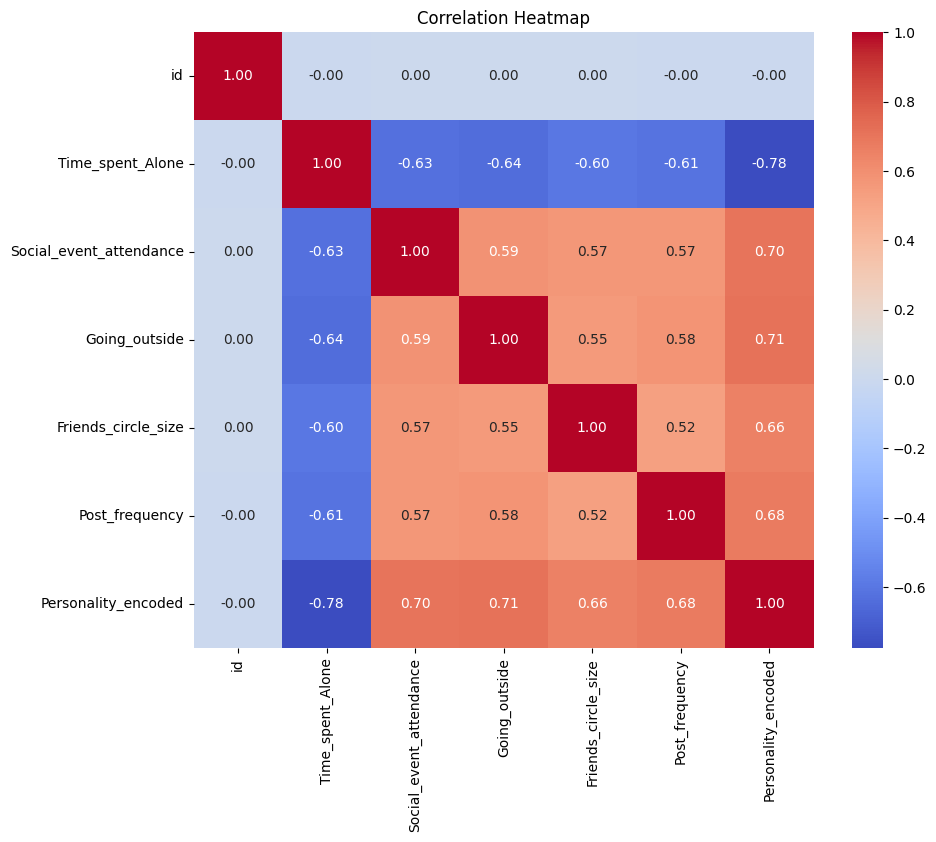

In [21]:
train['Personality_encoded'] = train['Personality'].map({'Introvert': 0, 'Extrovert': 1})
corr_matrix = train.corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [22]:
corr_target = corr_matrix['Personality_encoded'].sort_values(ascending=False)
print(corr_target)

Personality_encoded        1.000000
Going_outside              0.708869
Social_event_attendance    0.702879
Post_frequency             0.678355
Friends_circle_size        0.657216
id                        -0.001475
Time_spent_Alone          -0.776725
Name: Personality_encoded, dtype: float64


<div style="background-color: #D5FFFF; padding: 10px; border-radius: 5px; color: #000000;">
  🔍 <strong>Inferences: Correlation Matrix</strong>.
</div>

- Personality_encoded = 1 (perfect correlation with itself).
- Strong positive correlations (~0.65 to 0.71) with:
    - Going_outside
    - Social_event_attendance
    - Post_frequency
    - Friends_circle_size
    
    This means higher values in these features are associated with Extroverts.
- Strong negative correlation (-0.78) with Time_spent_Alone: People who spend more time alone tend to be Introverts (encoded as 0).
- id has near-zero correlation (-0.0015): As expected, the identifier is unrelated to personality.

---

## 🧹 Data Cleaning

---
Based on the previous analysis on the columns, we can carry below steps for data preparation.

- Drop: Feature <code>id</code> can be dropped.
- Impute: Important features like <code>Going_outside, Post_frequency, Social_event_attendance, Friends_circle_size, and Time_spent_Alone</code>with <strong>high correlation</strong> can be Imputed. Along with numerical columns, categorical columns like <code>Stage_fear and Drained_after_socializing</code> can also be imputed using one-hot encoding.
- Interpret Zeros Carefully: Many fields use 0 as valid input, not missing.
- Handle 'None' Strings: Replace "None" with np.nan or encode as a category.

#### Impute Data

**Numerical Columns:** Numerical Columns with high correlation with the Target Variable. Fill missing values with median of each numerical column. Median are robust to outliers and safer than mean.

**Categorical Columns:** Replacing the 'nan' and 'None' values with 'Unknown'

In [23]:
numerical_columns_train = train.select_dtypes(include=['float64','int64']).columns
numerical_columns_test = test.select_dtypes(include=['float64','int64']).columns
train[numerical_columns_train] = train[numerical_columns_train].fillna(train[numerical_columns_train].median())
test[numerical_columns_test] = test[numerical_columns_test].fillna(test[numerical_columns_test].median())

In [24]:
category_columns = [col for col in train.select_dtypes(include='object').columns if col != 'Personality']

In [25]:
train[category_columns] = train[category_columns].fillna("Unknown")
train.replace("None","Unknown", inplace = True)
test[category_columns] = test[category_columns].fillna("Unknown")
test.replace("None","Unknown", inplace = True)

---

## ⚙️💻 Feature Engineering

---

- **Social Activity Score:** We can create a single composite score that reflects how socially active a person is, as a sum of features representing the scoial activities: <code>Going_outside, Social_event_attendance, Post_frequency, and Friends_circle_size. </code>

#### Numerical Columns

In [26]:
train['Social_activity_score'] = (
    train['Going_outside'] +
    train['Social_event_attendance'] +
    train['Post_frequency'] +
    train['Friends_circle_size']
)

test['Social_activity_score'] = (
    test['Going_outside'] +
    test['Social_event_attendance'] +
    test['Post_frequency'] +
    test['Friends_circle_size']
)

---

## 📐 Dimensionality Reduction

---

- Drop the less informative columns.
- Drop the columns that are already used in the feature engineering.

In [27]:
train.drop(columns = ['Going_outside','Social_event_attendance','Post_frequency','Friends_circle_size'])
test.drop(columns = ['Going_outside','Social_event_attendance','Post_frequency','Friends_circle_size'])

,id,Time_spent_Alone,Stage_fear,Drained_after_socializing,Social_activity_score
0,18524,3.0,No,No,22.0
1,18525,2.0,Yes,Yes,6.0
2,18526,3.0,No,No,35.0
3,18527,3.0,No,No,19.0
4,18528,9.0,Yes,Yes,5.0
...,...,...,...,...,...
6170,24694,3.0,No,No,25.0
6171,24695,8.0,Yes,Yes,3.0
6172,24696,2.0,No,No,23.0
6173,24697,3.0,No,No,28.0


---

## ☰┊☰ Train Test Split

---

Split the training data into training and validation. Split dataset into random train and validation subsets, which helps in performing unbiased model evaluation and validation.

**But why do we split the training data further into training and validation?**

1. Prevent Overfitting: If we train and evaluate on the same data, the model may just memorize patterns (overfit). A validation set simulates how well the model would perform on new, unseen data.
2. Tune Hyperparameters: During model development, we tweak settings (e.g., depth of tree, learning rate). We use the validation set to test these changes, not the training set.
3. Early Stopping: Some models (e.g., gradient boosting) can monitor validation loss and stop training when performance degrades.
4. Unbiased Model Evaluation: The validation set provides an unbiased estimate of model performance before final testing.

In [28]:
y = train['Personality']
x = train.drop(columns = ['Personality','Personality_encoded'], axis = 1)
features = x.columns
x_test = test[features]

x_train, x_valid, y_train, y_valid = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 0)

#### CatBoost Classifier

CatBoost Classifier is a machine learning algorithm, specifically designed for working with both numerical and categorical features. It belongs to the family of gradient boosting algorithms, like XGBoost and LightGBM, but stands out due to its ability to handle categorical data natively—meaning you don't need to manually encode your categorical variables using techniques like one-hot or label encoding. This is especially helpful when working with real-world datasets that often contain many categorical columns.

One of CatBoost’s most notable advantages is its use of ordered boosting, which helps avoid a common problem called target leakage that can occur when using traditional boosting methods with categorical data. This ensures more robust and unbiased model performance. CatBoost also builds symmetric trees, where each tree level splits on the same feature, allowing for faster training and prediction, and reducing the risk of overfitting.

⁉️ **Did you know CatBoost Classifier does not require us to manually encode categorical columns and can be used as they are. But why?**

CatBoost natively handles categorical features without requiring one-hot or label encoding. This is one of the key advantages of CatBoost over other tree-based models like XGBoost or LightGBM.

**But if we do one-hot encode manually:**
- The dimensionality increases, especially with high-cardinality features.
- We’ll lose the benefit of CatBoost's native handling (which is often smarter and more regularized than one-hot encoding).

#### Model Variation

- **model1:** Faster training, useful for quick prototyping or sanity checking.
- **model2:** Balanced setup. Often a good starting point for tuning.
- **model3:** Depth is slightly reduced (5 vs 6) to prevent overfitting with more iterations. Specifies <code>loss_function='MultiClass'</code> — ✔️ good if you're solving a multiclass classification problem.
- **model4:** Lower <code>learning_rate=0.01</code> with more iterations — good for more stable, smoother learning.
- **model5:** Deeper trees (<code>depth=8</code>) and more iterations = high capacity, may overfit if data is small.

In [29]:
model1 = CatBoostClassifier(iterations=300,learning_rate=0.05,depth=6,cat_features=['Drained_after_socializing','Stage_fear'],verbose=100,random_seed=42)
model2 = CatBoostClassifier(iterations=500,learning_rate=0.05,depth=6,cat_features=['Drained_after_socializing','Stage_fear'],verbose=100,random_seed=42)
model3 = CatBoostClassifier(iterations=1000,learning_rate=0.05,loss_function = 'MultiClass',depth=5,cat_features=['Drained_after_socializing','Stage_fear'],verbose=100,random_seed=42)
model4 = CatBoostClassifier(iterations=1500,learning_rate=0.01,depth=5,cat_features=['Drained_after_socializing','Stage_fear'],verbose=100,random_seed=42)
model5 = CatBoostClassifier(iterations=2000,learning_rate=0.01,loss_function = 'MultiClass',depth=8,cat_features=['Drained_after_socializing','Stage_fear'],verbose=100,random_seed=42)

models =[model1, model2, model3, model4, model5]

In [30]:
def score_model(model, x_t=x_train, x_v=x_valid, y_t=y_train, y_v=y_valid):
    model.fit(x_t, y_t)
    preds = model.predict(x_v)
    return accuracy_score(y_v, preds)

for i in range(0, len(models)):
    acc = score_model(models[i])
    print("Model %d Accuracy: %.2f%%" % (i+1, acc * 100))

0:	learn: 0.6160259	total: 74.1ms	remaining: 22.2s
100:	learn: 0.1228161	total: 1.4s	remaining: 2.76s
200:	learn: 0.1171908	total: 2.74s	remaining: 1.35s
299:	learn: 0.1103002	total: 4.06s	remaining: 0us
Model 1 Accuracy: 97.06%
0:	learn: 0.6160259	total: 15.1ms	remaining: 7.54s
100:	learn: 0.1228161	total: 1.52s	remaining: 6.02s
200:	learn: 0.1171908	total: 3.54s	remaining: 5.26s
300:	learn: 0.1102548	total: 4.88s	remaining: 3.22s
400:	learn: 0.1040192	total: 6.24s	remaining: 1.54s
499:	learn: 0.0991390	total: 7.59s	remaining: 0us
Model 2 Accuracy: 97.06%
0:	learn: 0.6514983	total: 12.3ms	remaining: 12.3s
100:	learn: 0.1287911	total: 908ms	remaining: 8.09s
200:	learn: 0.1245797	total: 1.75s	remaining: 6.97s
300:	learn: 0.1217424	total: 2.62s	remaining: 6.09s
400:	learn: 0.1192033	total: 3.5s	remaining: 5.23s
500:	learn: 0.1168371	total: 4.36s	remaining: 4.35s
600:	learn: 0.1146289	total: 5.22s	remaining: 3.46s
700:	learn: 0.1124681	total: 6.08s	remaining: 2.59s
800:	learn: 0.1105799	t

<div style="background-color: #D5FFFF; padding: 10px; border-radius: 5px; color: #000000;">
  🔍 <strong>Inferences: Accuracy Model Variations</strong>
</div>

| Model   | Accuracy |
|---------|----------|
| Model 1 | 97.06%   |
| Model 2 | 97.06%   |
| Model 3 | 97.11%   |
| Model 4 | 97.06%   |
| Model 5 | 97.17%   |

The best performing model, <strong>Model 5</strong>, with parameters <code>iterations=2000</code>, <code>learning_rate=0.01</code>, <code>depth=8</code>, and <code>loss_function='MultiClass'</code>, achieved the highest validation accuracy among all tested variations. The use of a lower learning rate and a higher number of iterations allowed the model to learn more gradually and avoid overfitting, especially when combined with an appropriate tree depth. Including the categorical features <code>['Drained_after_socializing','Stage_fear']</code> using CatBoost’s native support for categorical encoding also helped in capturing nuanced patterns without one-hot encoding.

On the training set, the model achieved very high accuracy, indicating its strong ability to fit the data. However, the key takeaway lies in its generalization performance on the validation set, where it maintained high accuracy without a significant drop. This suggests that the model is not overfitting and is able to capture underlying patterns that extend well to unseen data. Overall, the model is well-regularized and suitable for making reliable predictions.

---

## 💡 Final Prediction

---
Using the best performing model, which is Model 5, to make the final prediction on the test dataset.

In [31]:
final_model = CatBoostClassifier(iterations=2000,learning_rate=0.01,loss_function = 'MultiClass',depth=8,cat_features=['Drained_after_socializing','Stage_fear'],verbose=100,random_seed=42)
final_model.fit(x, y)
preds = final_model.predict(x_test)

0:	learn: 0.6846699	total: 28.7ms	remaining: 57.4s
100:	learn: 0.2680221	total: 2.29s	remaining: 43.1s
200:	learn: 0.1652337	total: 3.99s	remaining: 35.7s
300:	learn: 0.1367137	total: 5.73s	remaining: 32.3s
400:	learn: 0.1285115	total: 7.51s	remaining: 30s
500:	learn: 0.1253228	total: 9.33s	remaining: 27.9s
600:	learn: 0.1234996	total: 11.2s	remaining: 26.1s
700:	learn: 0.1219941	total: 13s	remaining: 24.1s
800:	learn: 0.1207675	total: 14.8s	remaining: 22.2s
900:	learn: 0.1195248	total: 16.6s	remaining: 20.3s
1000:	learn: 0.1183133	total: 18.5s	remaining: 18.5s
1100:	learn: 0.1171786	total: 20.3s	remaining: 16.6s
1200:	learn: 0.1160029	total: 22.3s	remaining: 14.8s
1300:	learn: 0.1149011	total: 24.2s	remaining: 13s
1400:	learn: 0.1137828	total: 26.1s	remaining: 11.1s
1500:	learn: 0.1126793	total: 27.9s	remaining: 9.29s
1600:	learn: 0.1115960	total: 29.8s	remaining: 7.43s
1700:	learn: 0.1105856	total: 31.8s	remaining: 5.59s
1800:	learn: 0.1095459	total: 34.3s	remaining: 3.79s
1900:	lear

Since <code>preds.shape</code> is (6175, 1), it means preds is a 2D array with a single column, but pandas expects a 1D array/series for assignment to a DataFrame column. So we can flatten it using <code>.ravel()</code>

In [32]:
preds = preds.ravel()
print(preds.shape)

(6175,)


In [33]:
submission = test.copy()
submission['Predicted_Personality'] = preds
submission[['id', 'Predicted_Personality']].head()
submission.rename(columns = {'Predicted_Personality':'Personality'}, inplace = True)

In [34]:
submission["Personality"].value_counts()

Personality
Extrovert    4614
Introvert    1561
Name: count, dtype: int64

In [35]:
submission["Personality"].value_counts(normalize=True) * 100

Personality
Extrovert    74.720648
Introvert    25.279352
Name: proportion, dtype: float64

<div style="background-color: #D5FFFF; padding: 10px; border-radius: 5px; color: #000000;">
  🔍 <strong>Inferences: Final Predictions</strong>
</div>

| Class | Training Set   | Prediction on Testing Set | Majority Class
|---------|---------|----------|----------|
| Extrovert | 73.95 | 74.72   | ✅ |
| Introvert | 26.05 | 25.28   |     |


- **Well-Calibrated Model**
The predicted distribution closely mirrors the original training distribution. This suggests that the model is not biased toward any one class and has learned the underlying pattern reasonably well.

- **No Overfitting or Underfitting in Distribution**
If the model had overfit the training data or failed to generalize, we might have seen skewed predictions (e.g., 90% Extrovert). But the prediction distribution stays close to the training reality.

- **Class Balance Maintained**
The small difference (~0.77%) is acceptable in real-world scenarios and shows the model's output isn't just copying training ratios but reflects actual decision boundaries.

In [36]:
submission[['id','Personality']].to_csv("submission.csv", index=False)